# ML Model Building

As It is confirmed that the data is clean, the next step is to train the model. and we already tried with Label Encoder which is not working well. so we will try with Frequency Encoder. as gave better result.

## Data Loading and Cleaning


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import preprocessing_d
importlib.reload(preprocessing_d)
import preprocessing_d
import seaborn as sns


In [31]:
bikes=pd.read_csv("bikes.csv")
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [32]:
bikes[bikes["price"]==0].head(2)

,model_name,model_year,kms_driven,owner,location,mileage,power,price
4786,Bajaj Pulsar 180cc 2009,2009,60000 Km,second owner,delhi,\n\n 45 kmpl,17 bhp,0
6200,Hero Passion Xpro 110cc 2015,2015,9000 Km,first owner,jaipur,\n\n 55 kmpl,6.72 KW (9.1 Ps),0


In [33]:
# dropped rows where price is 0
bikes.drop(bikes[bikes["price"]==0].index,inplace=True)


In [34]:
bikes1=preprocessing_d.BikePreprocess(bikes)
bikes1.preprocess_dataset()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha Yzf-R15 150Cc 2011,2011,7000.0,1,Agra,42.0,16.0,55000,Yamaha,150.0
7853,Bajaj Discover 100Cc 2015,2015,80.0,1,Delhi,80.0,7.7,28000,Bajaj,100.0
7854,Bajaj Pulsar 180Cc 2016,2016,6407.0,1,Bangalore,65.0,17.0,61740,Bajaj,180.0
7855,Bajaj V15 150Cc 2016,2016,7524.0,1,Bangalore,57.0,11.0,49000,Bajaj,150.0


In [35]:
bikes=preprocessing_d.BikePreprocess(bikes).preprocess_dataset()
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0


In [36]:
bikes.shape

(7826, 10)

In [37]:
df = bikes[(bikes['price'] < 500000) & (bikes['kms_driven'] < 200000)]
df.shape

lower_cap = bikes['price'].quantile(0.01)
upper_cap = bikes['price'].quantile(0.99)
df['price'] = bikes['price'].clip(lower=lower_cap, upper=upper_cap)
df["price"]
bikes.loc[df["price"].index]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,Hyderabad,35.0,19.0,63500,Bajaj,220.0
1,Royal Enfield Classic 350Cc 2016,2016,50000.0,1,Hyderabad,35.0,19.0,115000,Royal,350.0
2,Hyosung Gt250R 2012,2012,14795.0,1,Hyderabad,30.0,28.0,300000,Hyosung,250.0
3,Bajaj Dominar 400 Abs 2017,2017,28.0,1,Pondicherry,28.0,34.0,100000,Bajaj,400.0
4,Jawa Perak 330Cc 2020,2020,2000.0,1,Bangalore,30.0,30.0,197500,Jawa,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha Yzf-R15 150Cc 2011,2011,7000.0,1,Agra,42.0,16.0,55000,Yamaha,150.0
7853,Bajaj Discover 100Cc 2015,2015,80.0,1,Delhi,80.0,7.7,28000,Bajaj,100.0
7854,Bajaj Pulsar 180Cc 2016,2016,6407.0,1,Bangalore,65.0,17.0,61740,Bajaj,180.0
7855,Bajaj V15 150Cc 2016,2016,7524.0,1,Bangalore,57.0,11.0,49000,Bajaj,150.0


In [38]:
bikes=bikes.loc[df["price"].index]

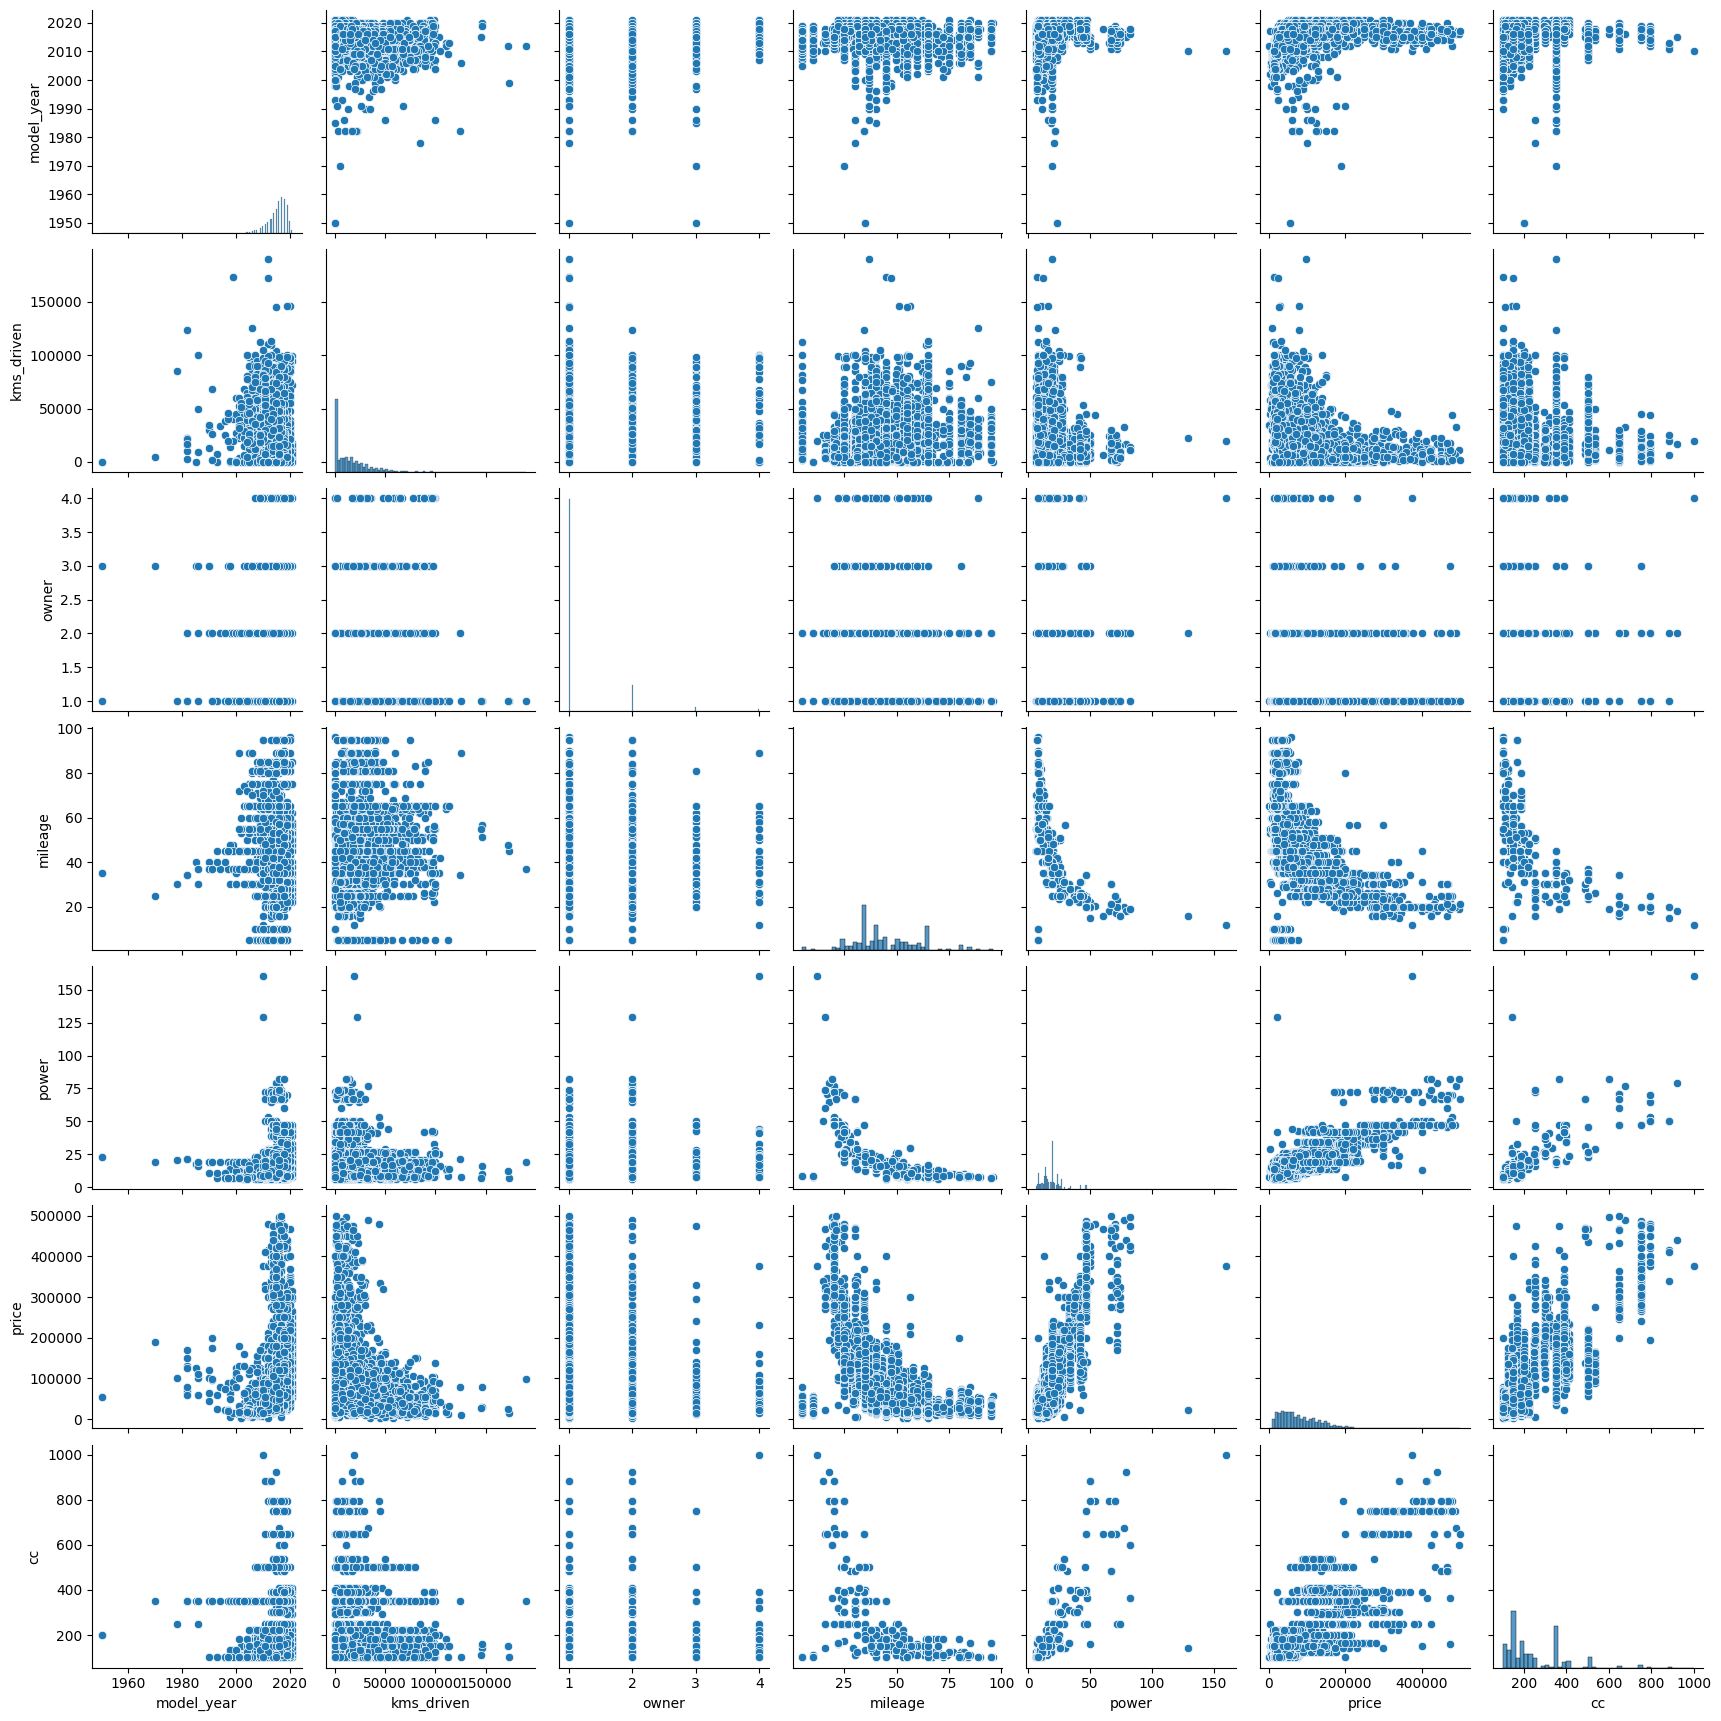

In [ ]:
#sns.pairplot(bikes);

In [40]:
location_encoder_freq=bikes['location'].value_counts()
model_name_encoder_freq=bikes['model_name'].value_counts()
brand_encoder_freq=bikes['brand'].value_counts()

In [41]:
categorical_cols = ['model_name', 'location', 'brand']
numerical_cols_x= ["kms_driven", "mileage", "power", "cc"]
y_col = "price"
categorical_encoders_freq={'model_name':model_name_encoder_freq, 'location':location_encoder_freq, 'brand':brand_encoder_freq}

In [42]:
import pickle
pickle.dump(categorical_encoders_freq, open("categorical_encoders_freq.pkl", "wb"))

In [45]:
from preprocessing_d import ML_scale_tranfsormed
bikes_trans=ML_scale_tranfsormed(bikes).transform_data_freq()

In [46]:
bikes_trans

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25,2017,17000.0,1,331,35.0,19.0,63500,2091,220.0
1,69,2016,50000.0,1,331,35.0,19.0,115000,1744,350.0
2,6,2012,14795.0,1,331,30.0,28.0,300000,52,250.0
3,31,2017,28.0,1,6,28.0,34.0,100000,2091,400.0
4,8,2020,2000.0,1,757,30.0,30.0,197500,46,330.0
...,...,...,...,...,...,...,...,...,...,...
7852,9,2011,7000.0,1,24,42.0,16.0,55000,744,150.0
7853,2,2015,80.0,1,1401,80.0,7.7,28000,2091,100.0
7854,19,2016,6407.0,1,757,65.0,17.0,61740,2091,180.0
7855,52,2016,7524.0,1,757,57.0,11.0,49000,2091,150.0


In [47]:
numerical_cols_x

['kms_driven', 'mileage', 'power', 'cc']

In [50]:
from sklearn.ensemble import IsolationForest


X = bikes_trans[numerical_cols_x]

# Initialize model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
bikes_trans['anomaly'] = iso_forest.fit_predict(X)

# -1 = anomaly, 1 = normal
df_outliers = bikes_trans[bikes_trans['anomaly'] == -1]
df_cleaned = bikes_trans[bikes_trans['anomaly'] == 1]
df_cleaned.shape

(7254, 11)

In [53]:
df_cleaned.drop("anomaly", axis=1, inplace=True)

In [55]:
bikes_trans=df_cleaned

In [60]:
bikes_trans.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,cc
0,25,2017,17000.0,1,331,35.0,19.0,63500,2091,220.0
1,69,2016,50000.0,1,331,35.0,19.0,115000,1744,350.0
2,6,2012,14795.0,1,331,30.0,28.0,300000,52,250.0
3,31,2017,28.0,1,6,28.0,34.0,100000,2091,400.0
4,8,2020,2000.0,1,757,30.0,30.0,197500,46,330.0


In [61]:
numerical_cols_x

['kms_driven', 'mileage', 'power', 'cc']

### Testing different models without scaling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

X=bikes_trans.drop("price", axis=1)
y=bikes_trans["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R2 Score: 0.6964130050005198
📌 RMSE: 31,114.84
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 36.52%
❌ High RMSE (more than 30% of mean price) — could be improved
Adjusted R-squared: 0.6945169030192601


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

R2 Score: 0.8695203472354791
📌 RMSE: 20,398.46
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 23.94%
⚠️ Acceptable RMSE (20–30% of mean price)
Adjusted R-squared: 0.8687054153306348


In [63]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))


R2 Score: 0.878697395324707
📌 RMSE: 19,668.04
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 23.09%
⚠️ Acceptable RMSE (20–30% of mean price)
Adjusted R-squared: 0.8779397801671237


In [64]:
from sklearn.model_selection import GridSearchCV
param_xg={
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 800, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xg_model=XGBRegressor()
grid_search= GridSearchCV(estimator=xg_model,
                          param_grid=param_xg,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs=-1,
                          verbose=2)
grid_search.fit(X_train, y_train)
model=grid_search.best_estimator_

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
R2 Score: 0.8822722434997559
📌 RMSE: 19,376.06
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 22.74%
⚠️ Acceptable RMSE (20–30% of mean price)
Adjusted R-squared: 0.8815369556381999


In [65]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the base model
cat_model = CatBoostRegressor(random_seed=42, verbose=False)

# Define the hyperparameter grid
param_grid = {
    'iterations': [300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='r2',        # or use 'neg_root_mean_squared_error'
    cv=5,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
model=grid_search.best_estimator_

# ===== 6. Evaluate =====
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Best Parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.1}
R2 Score: 0.8803224244973428
📌 RMSE: 19,535.85
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 22.93%
⚠️ Acceptable RMSE (20–30% of mean price)
Adjusted R-squared: 0.8795749587239049


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 600),         # number of trees
    'max_depth': [None] + list(range(5, 50)), # depth of each tree
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # number of random combinations
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # use all cores
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
model=random_search.best_estimator_
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = bikes_trans['price'].mean()
median_price = bikes_trans['price'].median()
min_price = bikes_trans['price'].min()
max_price = bikes_trans['price'].max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price:,.2f}")
print(f"⬇️ Min Price: {min_price:,.2f}")
print(f"⬆️ Max Price: {max_price:,.2f}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 28, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 228}
R2 Score: 0.878559914875869
📌 RMSE: 19,679.18
💰 Mean Price: 85,192.45
📈 Median Price: 74,000.00
⬇️ Min Price: 2,000.00
⬆️ Max Price: 466,875.00
📊 RMSE as % of mean price: 23.10%
⚠️ Acceptable RMSE (20–30% of mean price)
Adjusted R-squared: 0.8778014410617697


Tryinh model with Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

X=bikes_trans.drop("price", axis=1)
y=bikes_trans["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.preprocessing import QuantileTransformer
qt_normal_x = QuantileTransformer(output_distribution='normal', random_state=42)
qt_normal_y = QuantileTransformer(output_distribution='normal', random_state=42)
X_train[numerical_cols_x] = qt_normal_x.fit_transform(X_train[numerical_cols_x])
X_test[numerical_cols_x] = qt_normal_x.transform(X_test[numerical_cols_x])
y_train = qt_normal_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = qt_normal_y.transform(y_test.values.reshape(-1, 1))

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(100, 600),         # number of trees
    'max_depth': [None] + list(range(5, 50)), # depth of each tree
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # number of random combinations
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # use all cores
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
model=random_search.best_estimator_
y_pred = model.predict(X_test)
# Suppose you already calculated RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Check price statistics in bikes1
mean_price = y_train.mean()
median_price = pd.DataFrame(y_train).median()
min_price = y_train.min()
max_price = y_train.max()

# Calculate relative error (as a percentage of mean price)
relative_error = (rmse / mean_price) * 100
print("R2 Score:", r2_score(y_test, y_pred))
# Print comparison
print(f"📌 RMSE: {rmse:,.2f}")
print(f"💰 Mean Price: {mean_price:,.2f}")
print(f"📈 Median Price: {median_price}")
print(f"⬇️ Min Price: {min_price}")
print(f"⬆️ Max Price: {max_price}")
print(f"📊 RMSE as % of mean price: {relative_error:.2f}%")

# Optional quick judgement
if relative_error < 10:
    print("✅ Excellent RMSE (less than 10% of mean price)")
elif relative_error < 20:
    print("✅ Good RMSE (10–20% of mean price)")
elif relative_error < 30:
    print("⚠️ Acceptable RMSE (20–30% of mean price)")
else:
    print("❌ High RMSE (more than 30% of mean price) — could be improved")
print("Adjusted R-squared:", 1 - (1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 306}
R2 Score: 0.8679649372286261
📌 RMSE: 0.37
💰 Mean Price: -0.00
📈 Median Price: 0   -0.001255
dtype: float64
⬇️ Min Price: -5.199337582605575
⬆️ Max Price: 5.19933758270342
📊 RMSE as % of mean price: -377888.17%
✅ Excellent RMSE (less than 10% of mean price)
Adjusted R-squared: 0.8671402907574656


In [81]:
pd.DataFrame(y_train).mean()

0   -0.000099
dtype: float64

In [82]:
y_train.min()

np.float64(-5.199337582605575)